# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. Training our own agent

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import time
import torch
from collections import deque
from unityagents import UnityEnvironment
from ddpg_agent import Agent

def ddpg(num_episodes=2000, max_t=1000):
    best_score = -np.inf
    actor_weights_name='actor.pth'
    critic_weights_name='critic.pth'
    average_scores = list() 
    moving_averages = list()
    scores_window = deque(maxlen=100) 
    
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        scores = np.zeros(num_agents) 
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) 
            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations 
            rewards = env_info.rewards 
            dones = env_info.local_done 
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        average_scores.append(np.mean(scores))  
        scores_window.append(average_scores[-1])
        moving_averages.append(np.mean(scores_window))
        if i_episode % 10 == 0:
            print("\rEpisode {} \tAverage_Score: {:.1f}\t"\
                  .format(i_episode, average_scores[-1]))
        if moving_averages[-1] >= 30.0:
            print("\nIt took {:d} episodes to solve the environment with an \tAverage score: {:.2f}"\
                 .format(i_episode, moving_averages[-1]))
            torch.save(agent.actor_local.state_dict(), actor_weights_name)
            torch.save(agent.critic_local.state_dict(), critic_weights_name)
            break
            
    return average_scores, moving_averages



In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

In [7]:
scores, averages = ddpg(num_episodes=2000, max_t=1000)

Episode 10 	Average_Score: 0.8	
Episode 20 	Average_Score: 1.5	
Episode 30 	Average_Score: 0.4	
Episode 40 	Average_Score: 1.9	
Episode 50 	Average_Score: 0.7	
Episode 60 	Average_Score: 2.6	
Episode 70 	Average_Score: 4.8	
Episode 80 	Average_Score: 5.7	
Episode 90 	Average_Score: 4.6	
Episode 100 	Average_Score: 4.0	
Episode 110 	Average_Score: 12.5	
Episode 120 	Average_Score: 10.5	
Episode 130 	Average_Score: 5.4	
Episode 140 	Average_Score: 10.4	
Episode 150 	Average_Score: 17.7	
Episode 160 	Average_Score: 10.1	
Episode 170 	Average_Score: 10.3	
Episode 180 	Average_Score: 6.6	
Episode 190 	Average_Score: 15.4	
Episode 200 	Average_Score: 16.8	
Episode 210 	Average_Score: 13.7	
Episode 220 	Average_Score: 16.6	
Episode 230 	Average_Score: 5.1	
Episode 240 	Average_Score: 13.2	
Episode 250 	Average_Score: 20.3	
Episode 260 	Average_Score: 15.7	
Episode 270 	Average_Score: 9.7	
Episode 280 	Average_Score: 15.8	
Episode 290 	Average_Score: 9.8	
Episode 300 	Average_Score: 14.3	
Epis

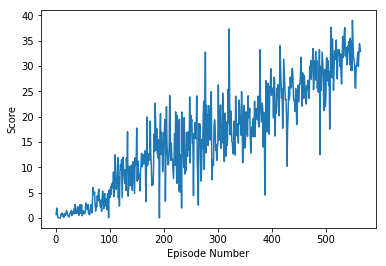

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode Number')
plt.show()
